## Advanced Financial Technology Coursework 2

-Mannat Soni
cz22306@bristol.ac.uk

### Introduction
This project is divided into three parts: a) Making the data stationary, b) Applying Autocorrelation function and Partial Autocorrelation Function, c) Applying autoregression to the stationary data using the information optained by ACF and PACF.

### Part 1: Making Data Stationary
In this part we begin by importing the necessary libraries and then reading the data set (Microsoft closing stock price from 2021-12-31 to 2022-12-30). We then plot the closing price to check if its stationary. As it is not stationary, we then take two times difference of Closing price to make the data stationary and check with both Augmented Dickey-Fuller Test and KPSS test. We additionally create two columns T-1, and T-2 which represent lag 1 and lag 2. With the end of this section we have "Close_Diff" column which is stationary.

In [1]:
#importing libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import statsmodels.api as sm
%config InlineBackend.figure_format = 'retina'

In [2]:
#reading the Microsoft stock colsing price data
msft=pd.read_csv('MSFT.csv',header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])
msft.head()

,Close
Date,
2021-12-31,336.320007
2022-01-03,334.750000
2022-01-04,329.010010
2022-01-05,316.380005
2022-01-06,313.880005


<AxesSubplot:xlabel='Date'>

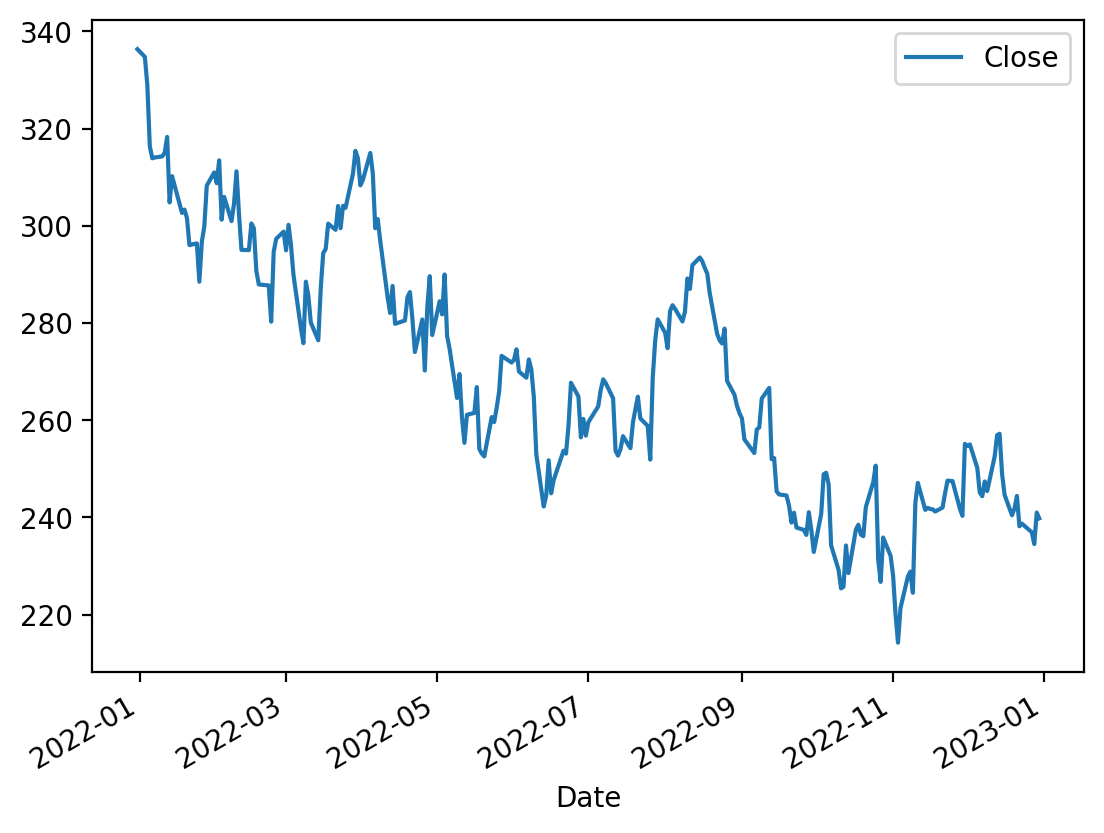

In [3]:
#ploting the close price
msft.plot()

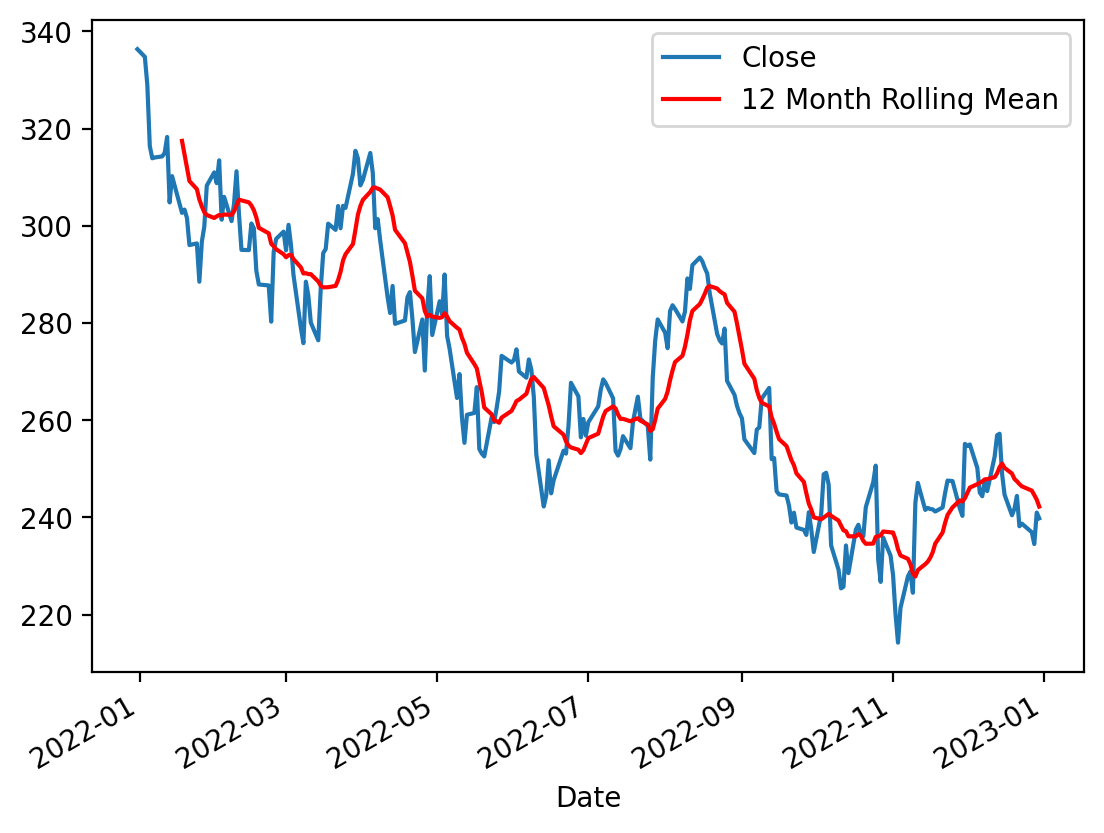

In [4]:
msft.plot()
msft['Close'].rolling(12).mean().plot(label='12 Month Rolling Mean', color='red')

plt.legend()

There is an overall downward trend that is observed with ocassional peaks during April and end of August 2022. On eye viewing the data looks very non-stationary. Let us check by plotting mean and standard deviation.

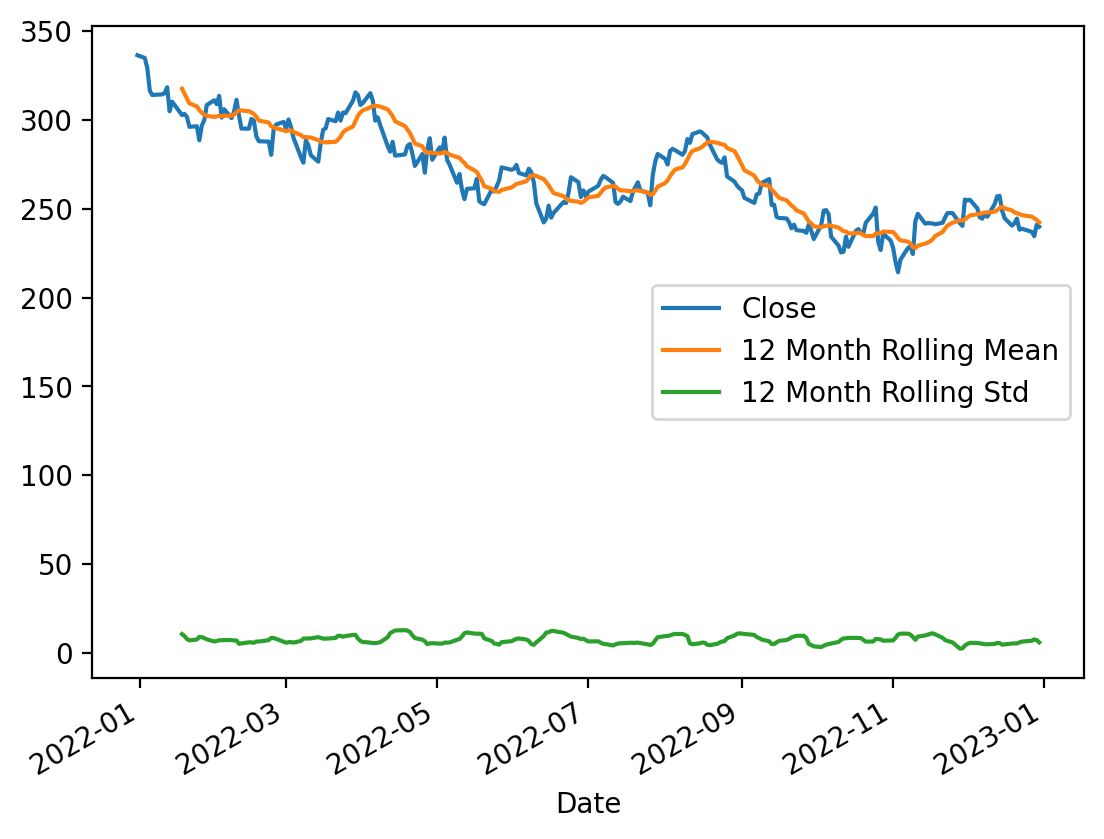

In [5]:
#plotting the rolling mean and rolling standard deviation with 12 months
msft.plot()
msft['Close'].rolling(12).mean().plot(label='12 Month Rolling Mean')
msft['Close'].rolling(12).std().plot(label='12 Month Rolling Std')

plt.legend()

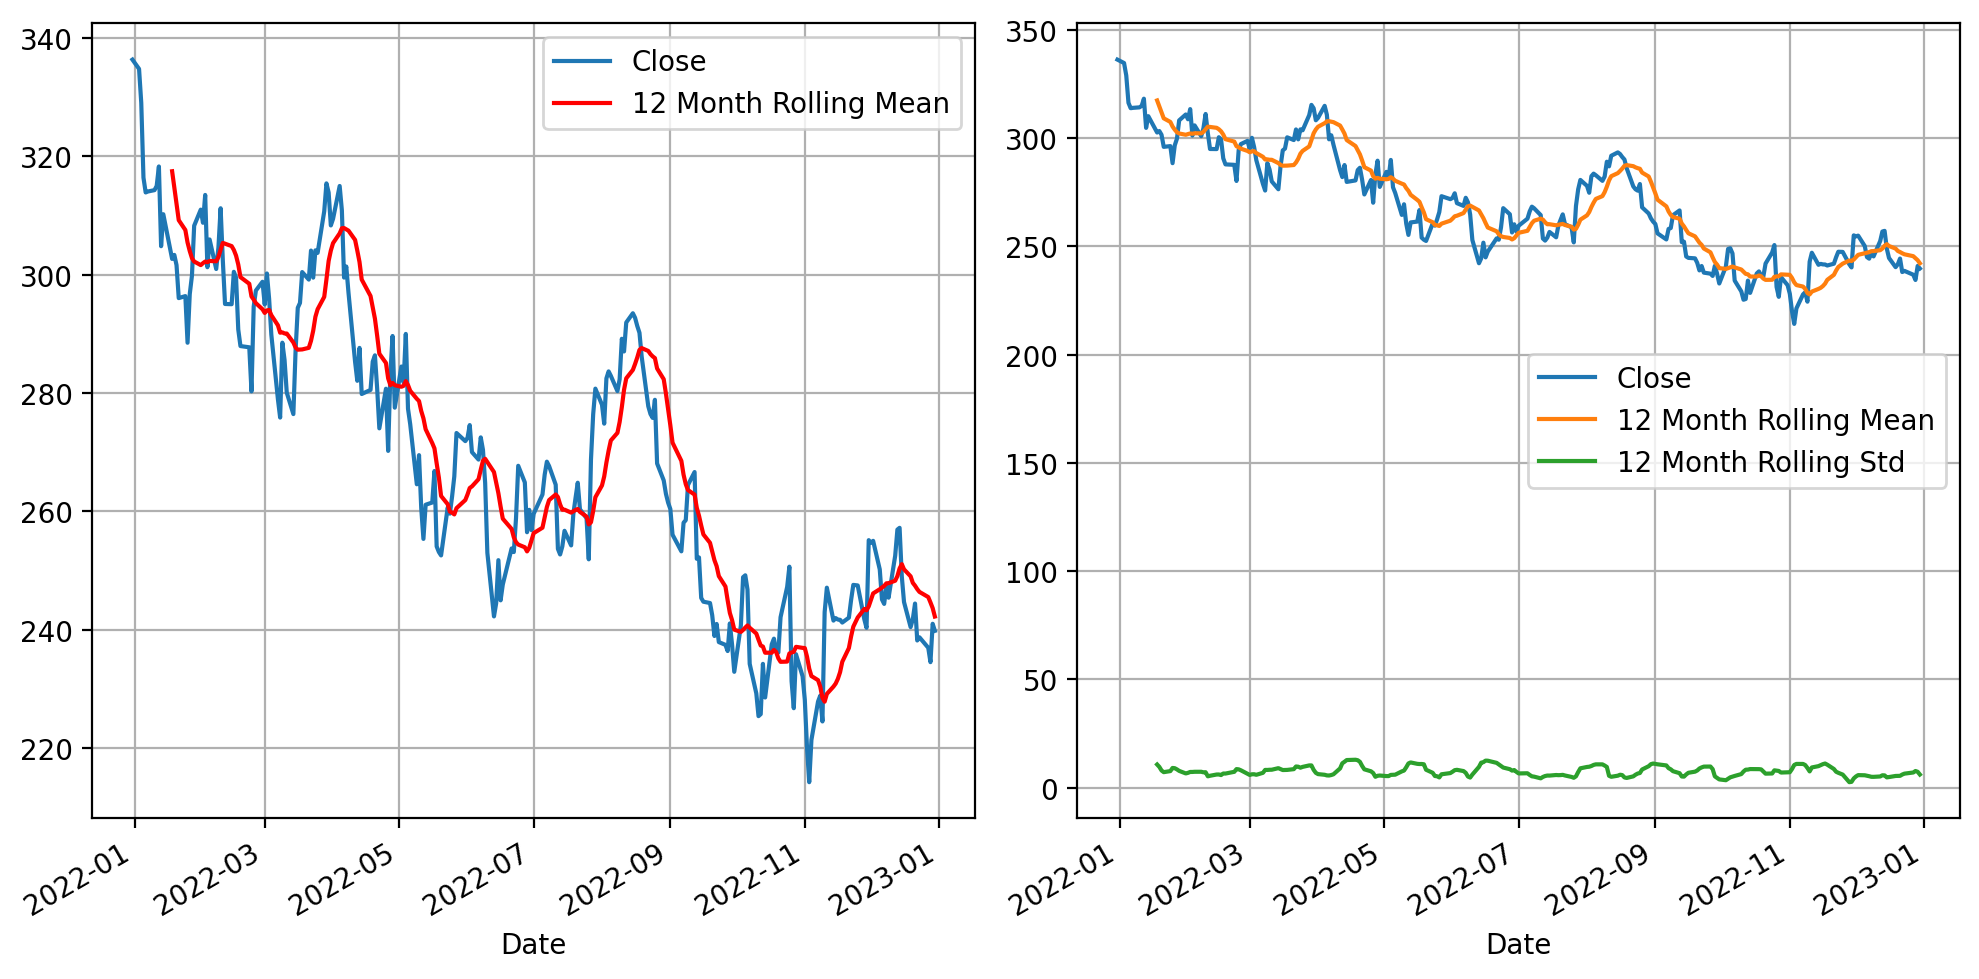

In [6]:
plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams["figure.autolayout"] = True

plt.subplot(121)
plt.plot(msft['Close'], label='Close')
msft['Close'].rolling(12).mean().plot(label='12 Month Rolling Mean', color='red')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(msft['Close'], label='Close')
msft['Close'].rolling(12).mean().plot(label='12 Month Rolling Mean')
msft['Close'].rolling(12).std().plot(label='12 Month Rolling Std')
plt.legend()
plt.grid()



Even though the variation in standard deviation is small, the mean of the time series is changing with time. Thus visually it looks like a non stationary data. Let us confirm our hypothesis with Augmented Dickey-Fuller Test. We chose this test as this is one of the most preffered test for testing stationarity over the feild of time series research. 

# Close

In [7]:
#importing library
from statsmodels.tsa.stattools import adfuller

# Store in a function for later use also.
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [8]:
#applying Augmented Dickey-Fuller Test    
adf_check(msft['Close'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.5749877974447424
p-value : 0.09827775200539735
#Lags Used : 0
Number of Observations Used : 251
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Our time series is non-stationary.

# Close_diff

In [9]:
#We perform stationarity by taking two order difference of Close prices. 
#This means Close_diff[i] = Close[i+1] - Close [i]
msft['Close_diff'] = msft['Close'].diff()
msft.head()

,Close,Close_diff
Date,,
2021-12-31,336.320007,NaN
2022-01-03,334.750000,-1.570007
2022-01-04,329.010010,-5.739990
2022-01-05,316.380005,-12.630005
2022-01-06,313.880005,-2.500000


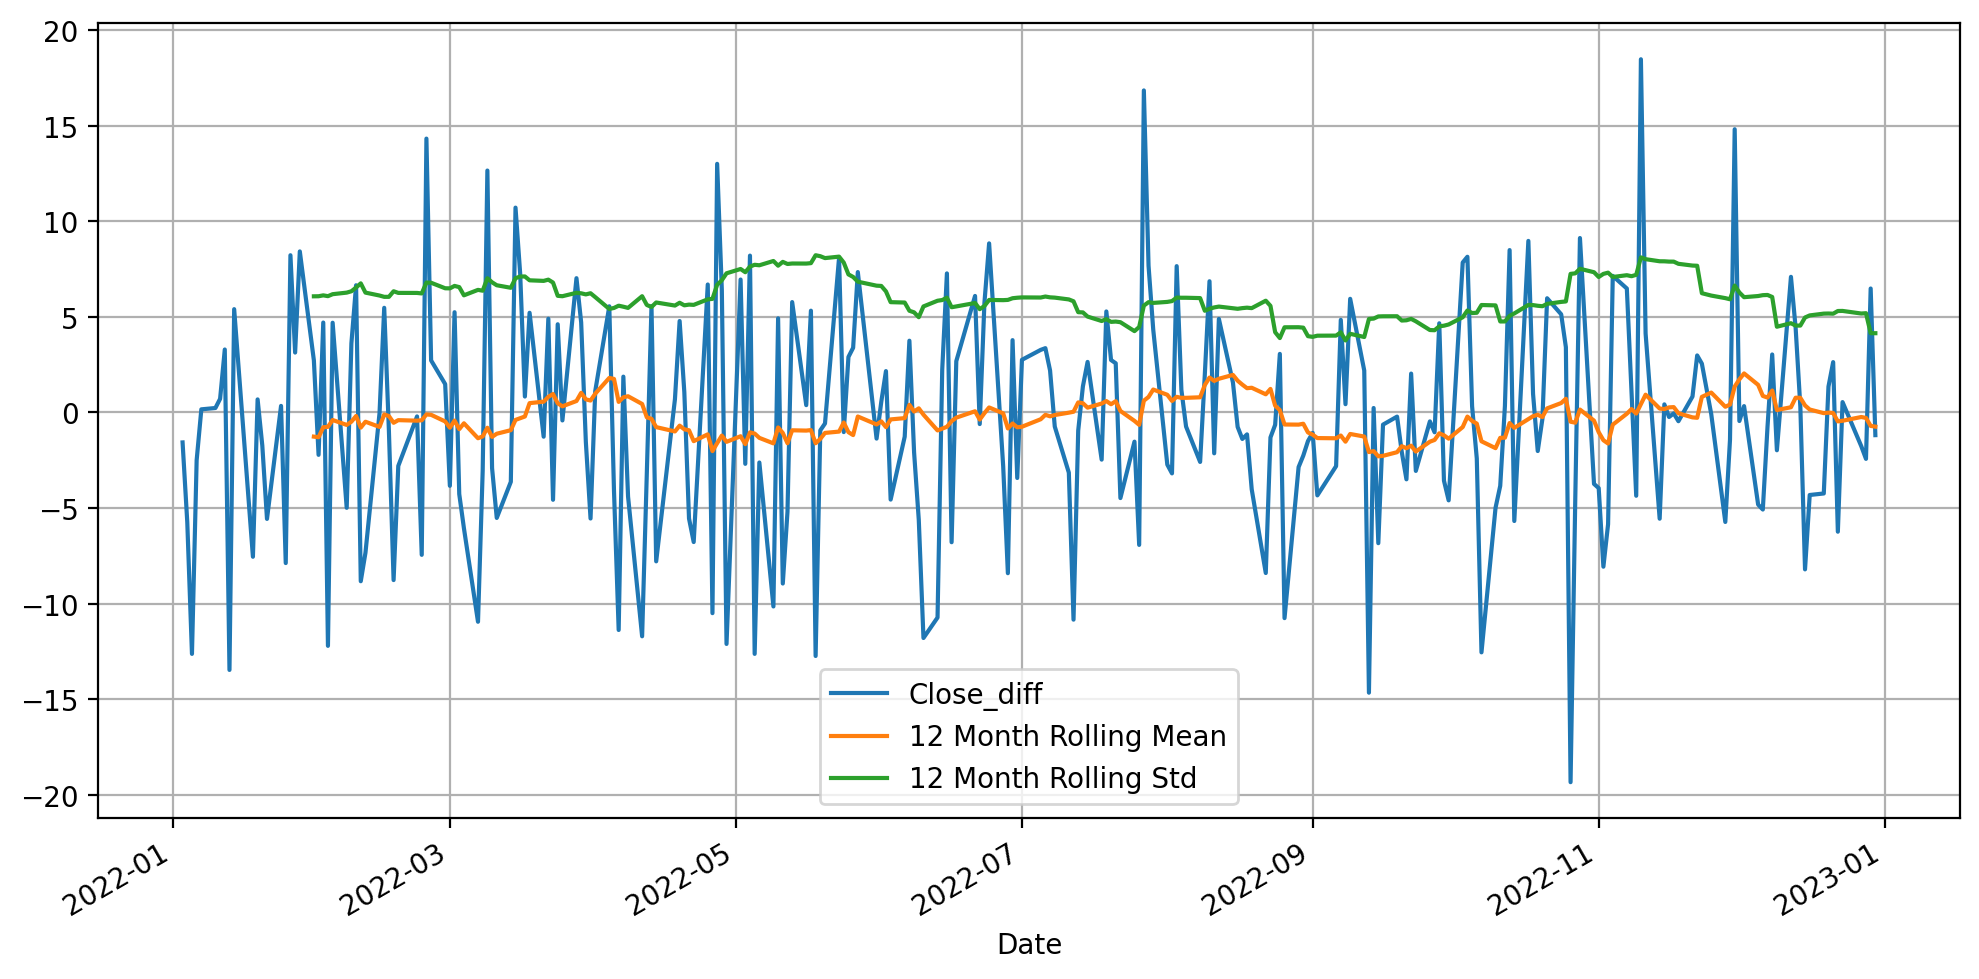

In [10]:
#plotting the Close_diff
msft['Close_diff'].plot()
msft['Close_diff'].rolling(20).mean().plot(label='12 Month Rolling Mean')
msft['Close_diff'].rolling(20).std().plot(label='12 Month Rolling Std')
plt.legend()
plt.grid()

In [11]:
#Checking for stationarity
adf_check(msft['Close_diff'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -10.748862720814977
p-value : 2.6974734819840253e-19
#Lags Used : 2
Number of Observations Used : 248
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


Our data does not have a unit node and should be stationary. Let us confirm if it has any trends or not using KPSS test.

In [12]:
#importing library
from statsmodels.tsa.stattools import kpss

#storing kpss in a function
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

In [13]:
kpss_test(msft['Close_diff'].dropna())

KPSS Statistic: 0.09301158695829838
p-value: 0.1
num lags: 9
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\sonim\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


The data has no trend and thus it is stationary.

# Close_log

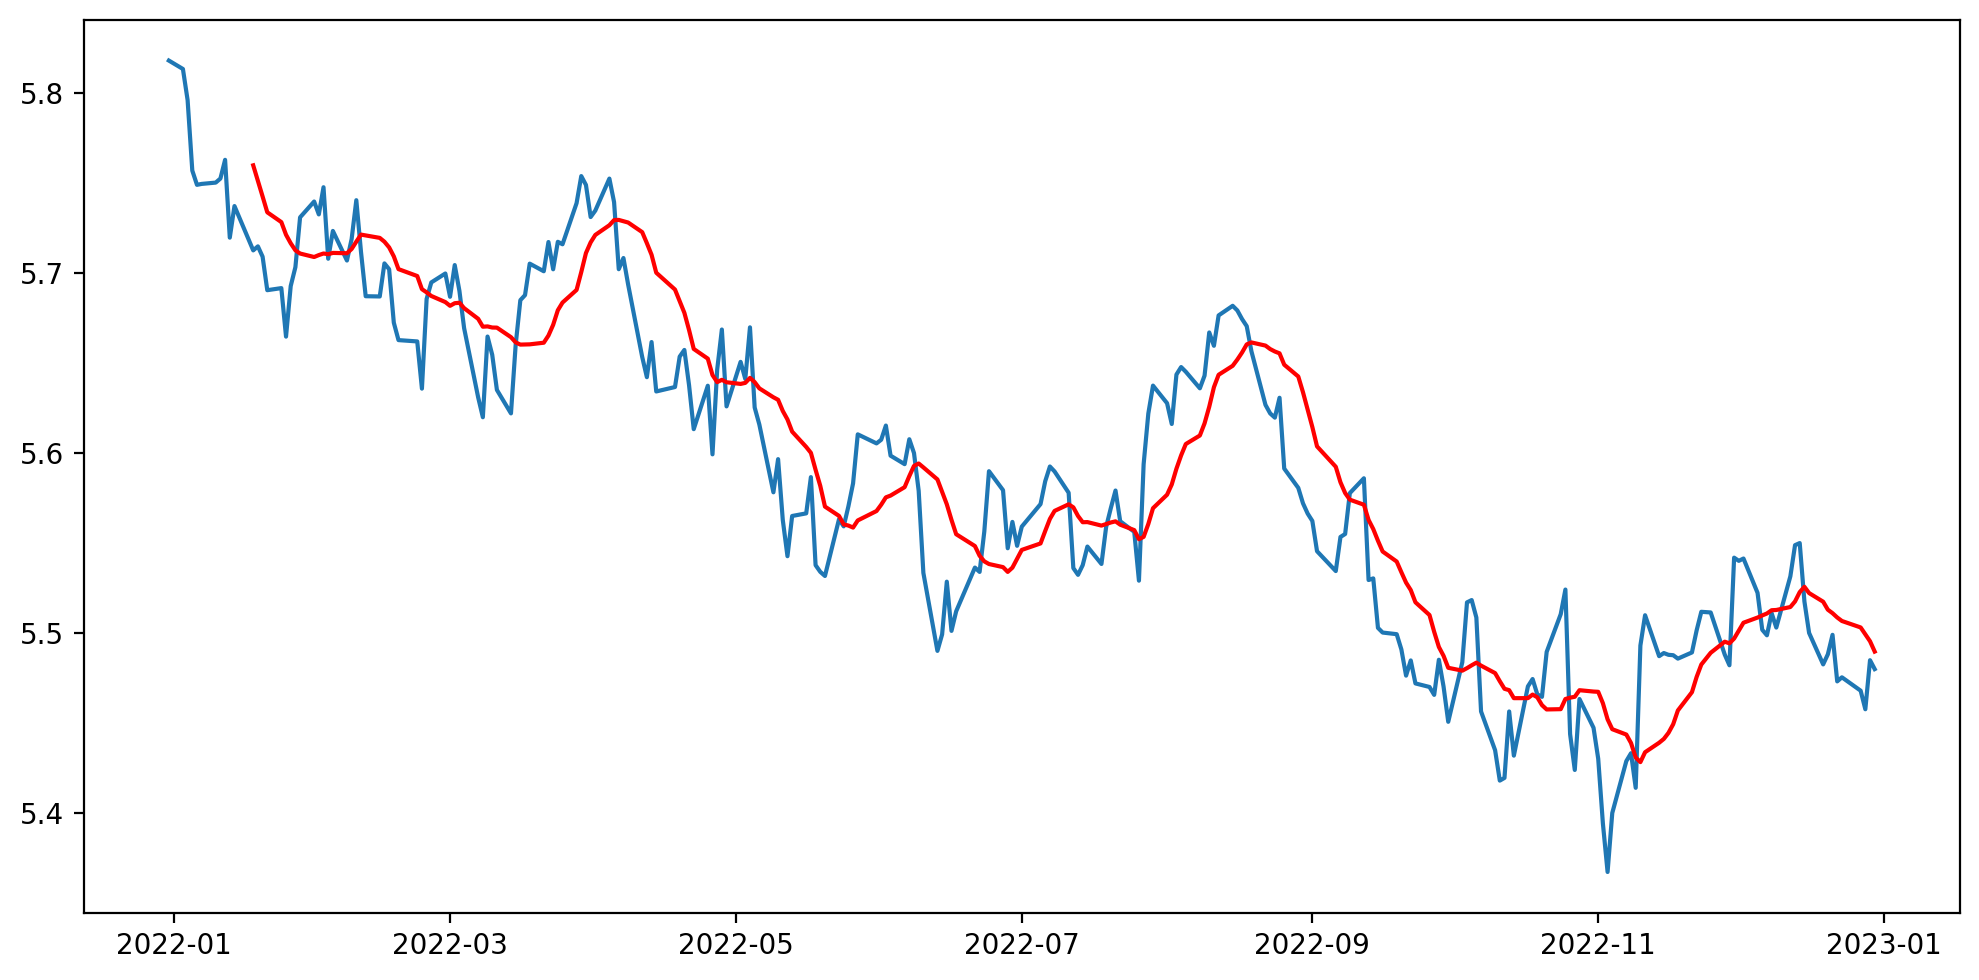

In [14]:
msft['Close_log']=np.log(msft['Close'])
moving_avg = msft['Close_log'].rolling(12).mean()
plt.plot(msft['Close_log'])
plt.plot(moving_avg, color='red')

In [15]:
adf_check(msft['Close_log'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.4322732757800933
p-value : 0.13283389516695782
#Lags Used : 0
Number of Observations Used : 251
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [16]:
kpss_test(msft['Close_log'].dropna())

KPSS Statistic: 1.9121408281805994
p-value: 0.01
num lags: 10
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


C:\Users\sonim\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


# Close_log_diff

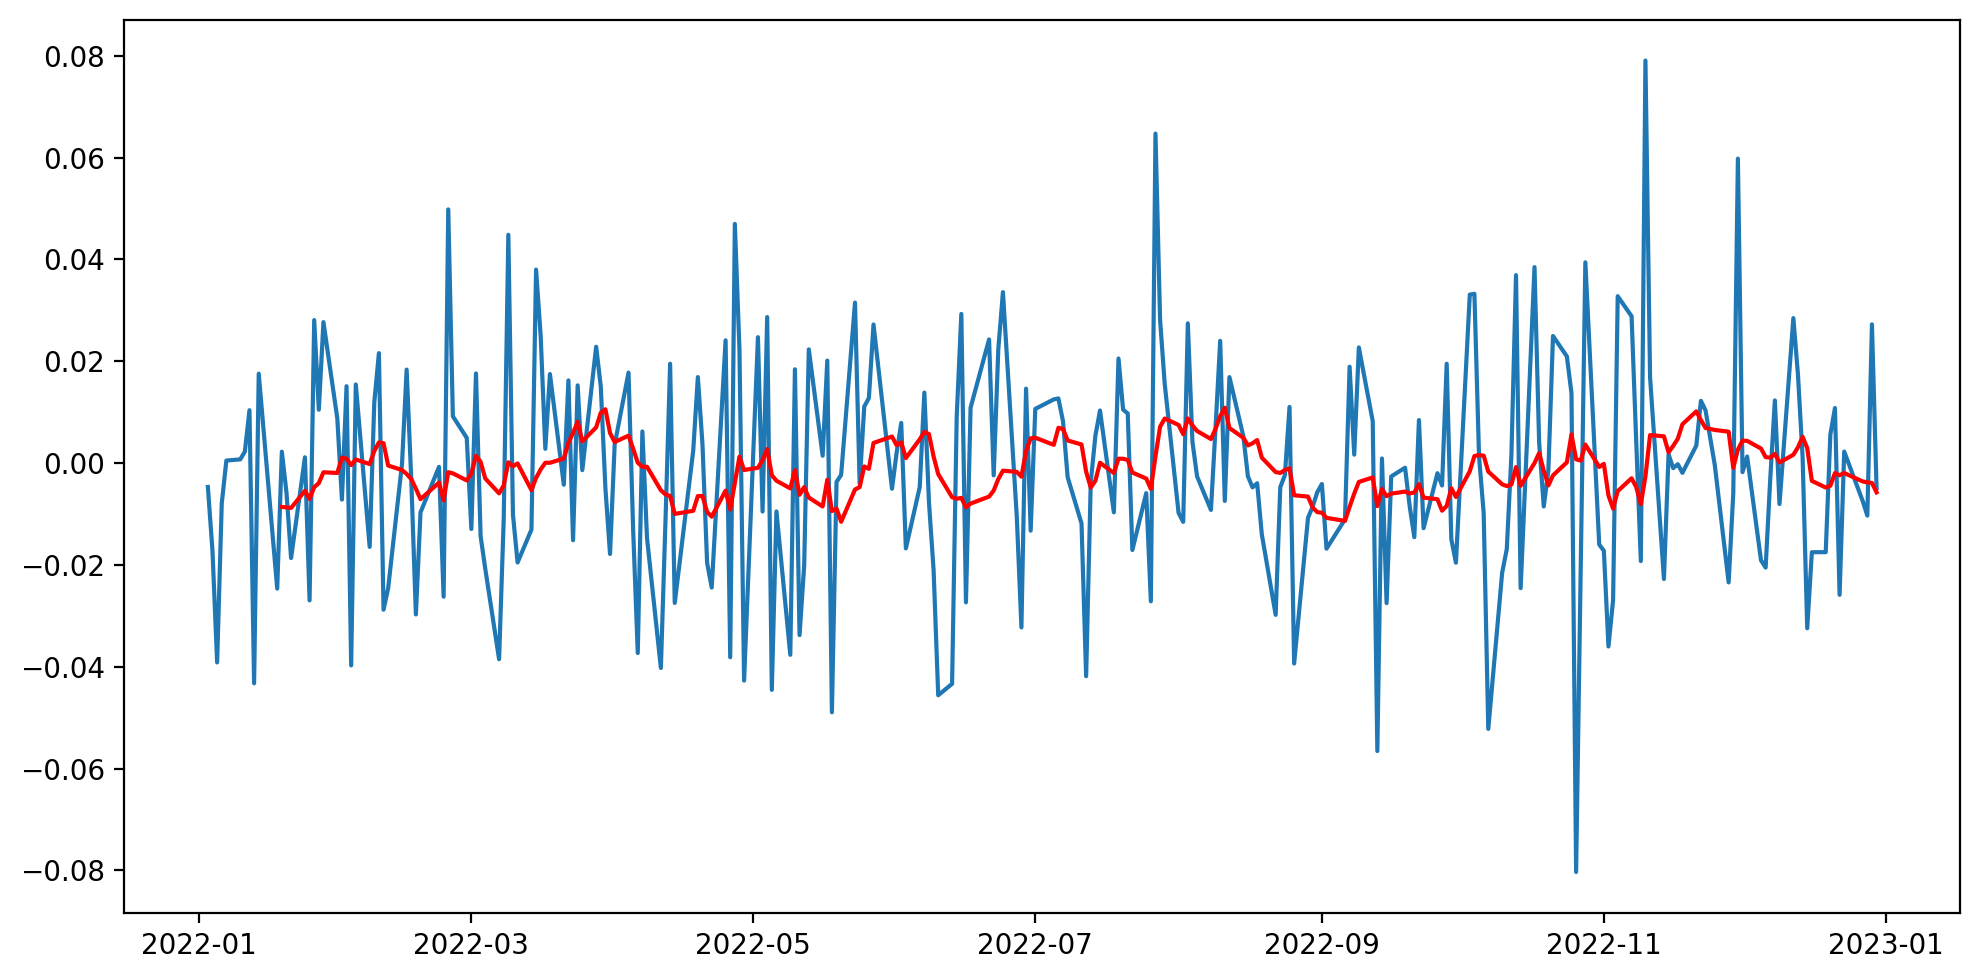

In [18]:
msft['Close_log_diff']=np.log(msft['Close']).diff()
moving_avg = msft['Close_log_diff'].rolling(12).mean()
plt.plot(msft['Close_log_diff'])
plt.plot(moving_avg, color='red')

In [19]:
adf_check(msft['Close_log_diff'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -10.784456017085045
p-value : 2.2124184740019867e-19
#Lags Used : 2
Number of Observations Used : 248
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


# Close_log_MA

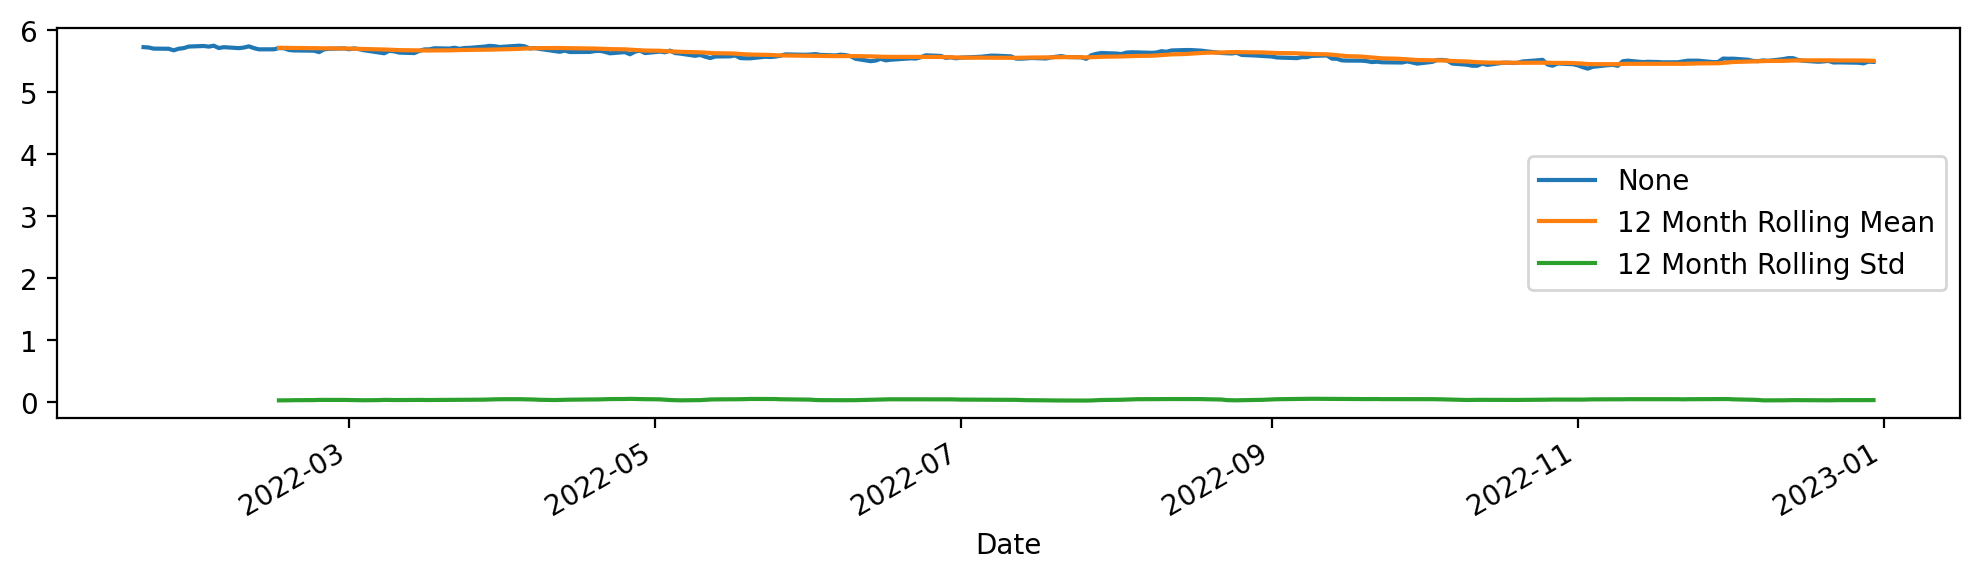

In [38]:
Close_log_moving_avg_diff=msft['Close_log']-moving_avg
Close_log_moving_avg_diff.dropna(inplace=True)

Close_log_moving_avg_diff.plot()
Close_log_moving_avg_diff.rolling(20).mean().plot(label='12 Month Rolling Mean')
Close_log_moving_avg_diff.rolling(20).std().plot(label='12 Month Rolling Std')

plt.legend()

In [24]:
adf_check(Close_log_moving_avg_diff.dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -7.4527629453194475
p-value : 5.6139119676857805e-11
#Lags Used : 11
Number of Observations Used : 228
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [25]:
kpss_test(Close_log_moving_avg_diff.dropna())

KPSS Statistic: 0.025158692666399914
p-value: 0.1
num lags: 9
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\sonim\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


<Figure size 1000x500 with 0 Axes>

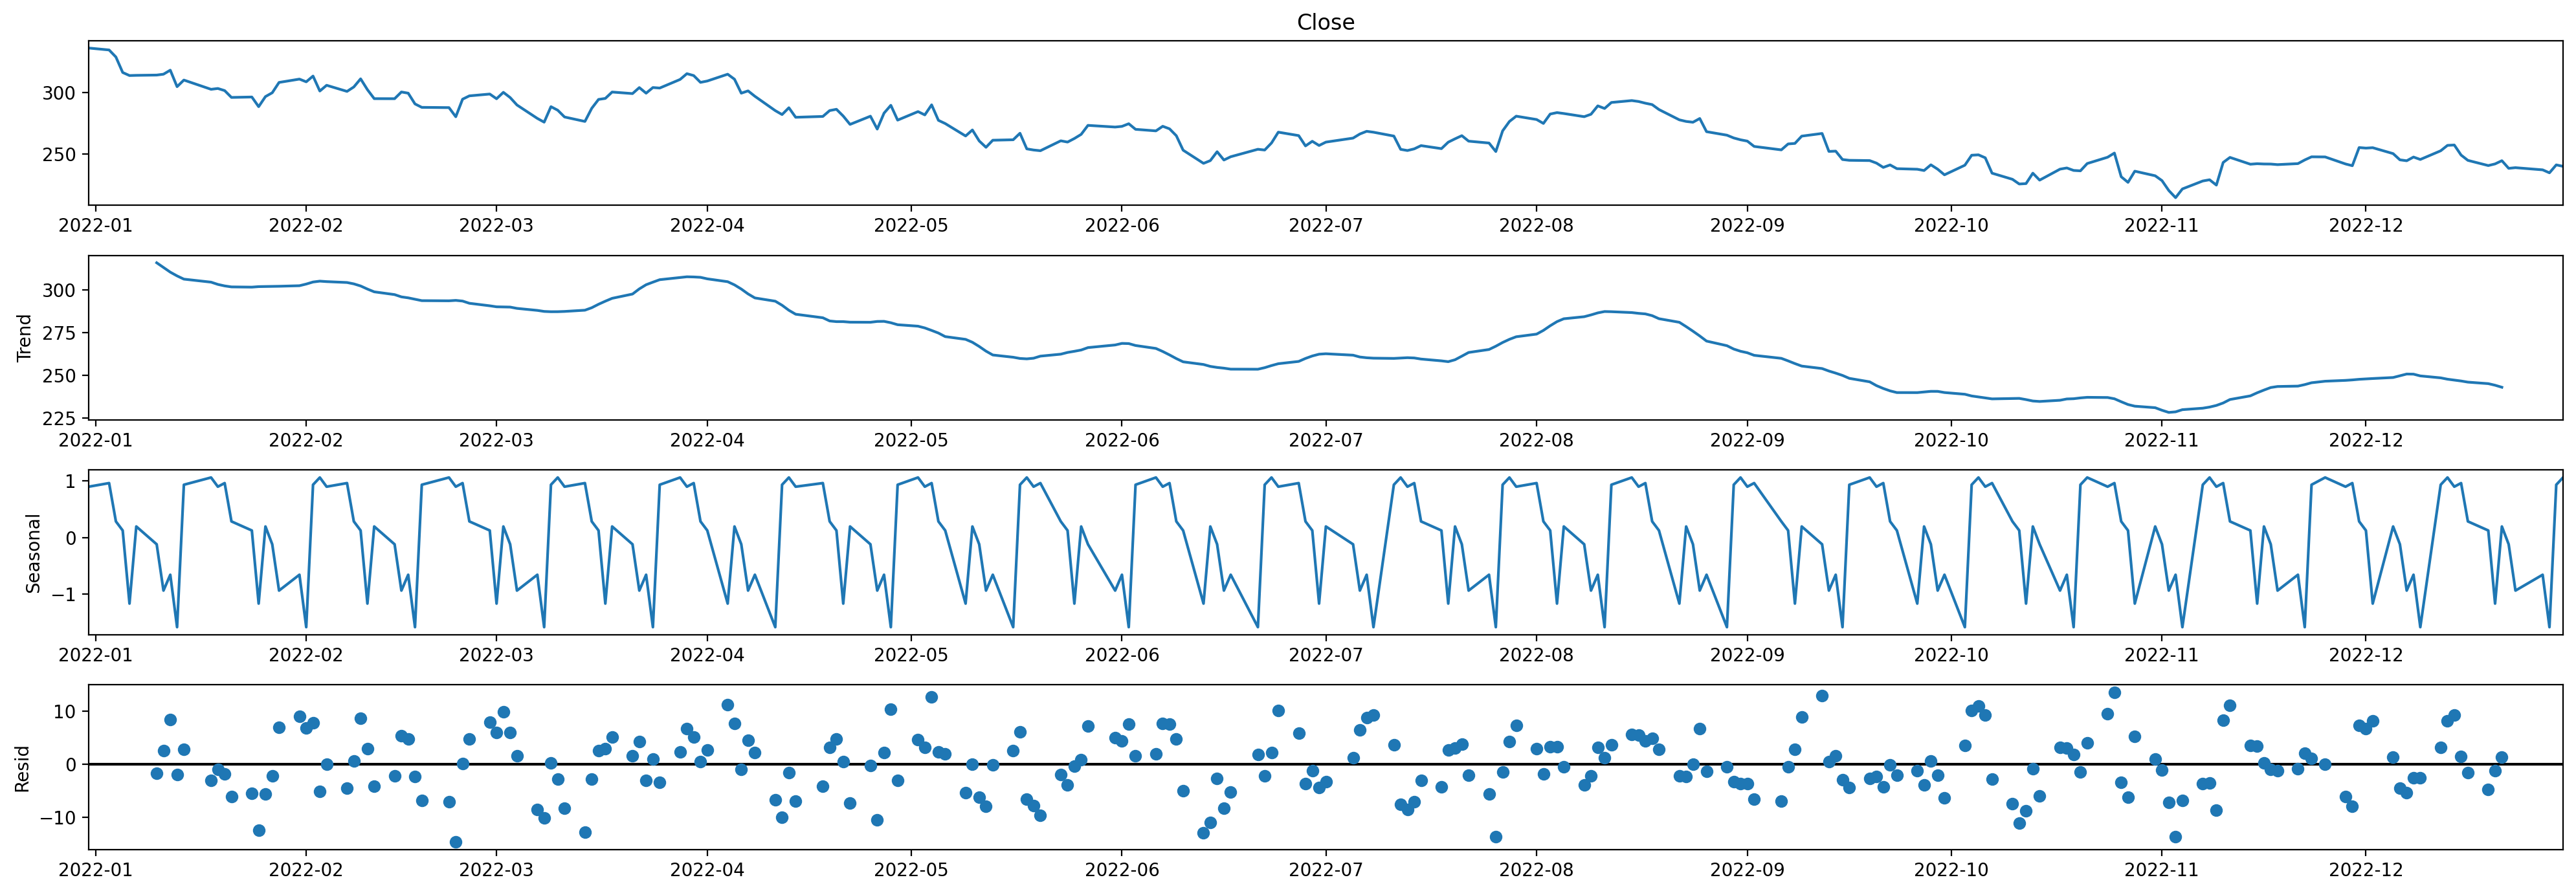

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(msft['Close'], period = 12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(20,7)

# Expected MA

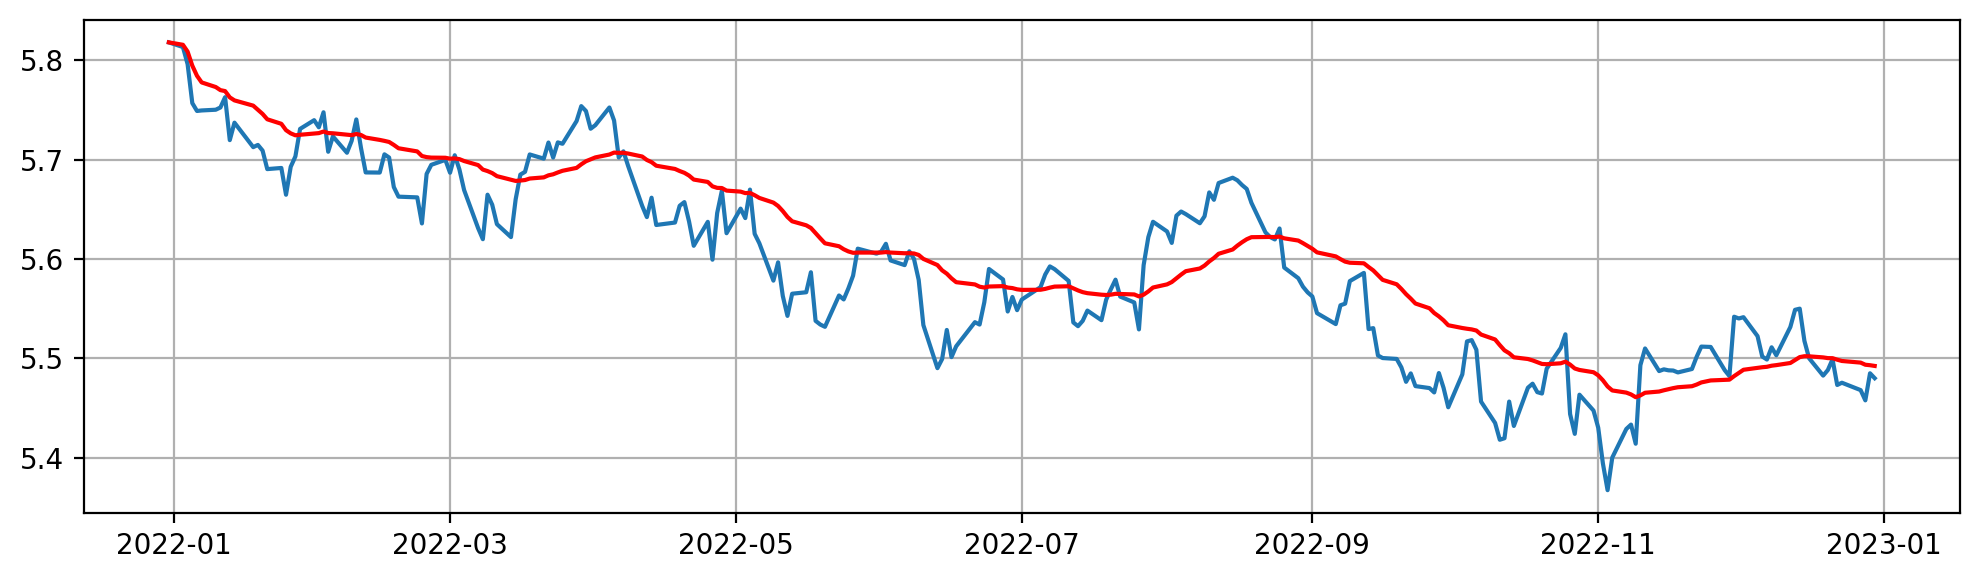

In [40]:
expweighted_avg=msft['Close_log'].ewm(halflife=12).mean()
plt.plot(msft['Close_log'])
plt.plot(expweighted_avg, color='red')
plt.grid()

In [41]:
#Close_log_ewm_diff=msft['Close_log']-expweighted_avg
msft['ExpW']=msft['Close_log']-expweighted_avg

In [42]:
adf_check(msft['ExpW'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.267844735953257
p-value : 0.0005047472602676867
#Lags Used : 0
Number of Observations Used : 251
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [43]:
kpss_test(msft['ExpW'].dropna())

KPSS Statistic: 0.09771207320798735
p-value: 0.1
num lags: 9
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\sonim\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


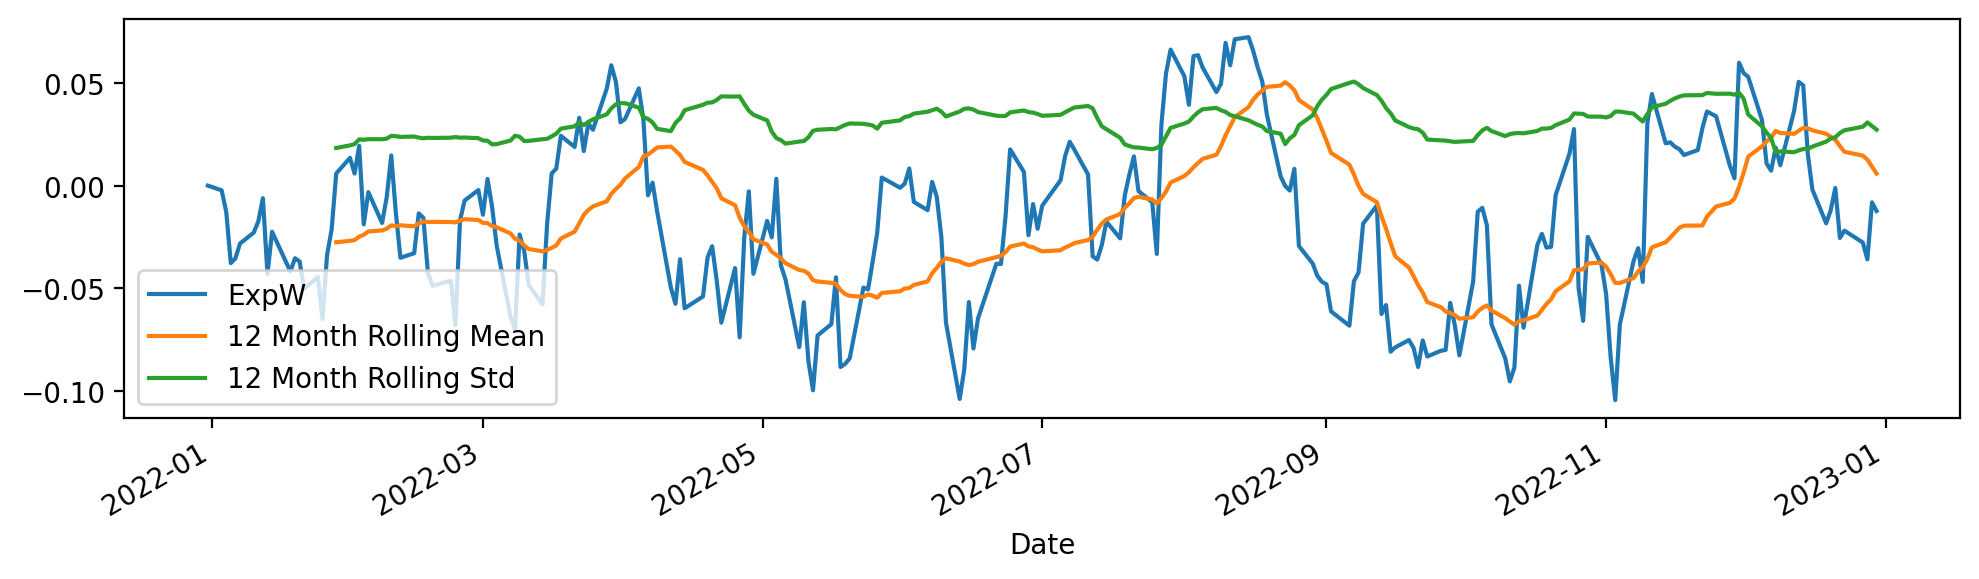

In [44]:
plt.rcParams["figure.figsize"] = [10,3]
msft['ExpW'].plot()
msft['ExpW'].rolling(20).mean().plot(label='12 Month Rolling Mean')
msft['ExpW'].rolling(20).std().plot(label='12 Month Rolling Std')

plt.legend()

The log trick doesnt necessarily gives a satisfactory plot, thus we will stick to taking a single difference for making time series stationary. Now our data is stationary.

### Part 2: Autocorelation function (ACF) and Partial Autocorrelation Function (PACF)

In this part we begin by creating lags in our dataset, T-1 and T-2. We then find residual values for both (T,T-1) and (T-2, T-1) series from scratch in order to computer PACF values using its mathematical formula i.e.

$\operatorname{PACF}\left(\boldsymbol{T}_{i}, \boldsymbol{k}=\mathbf{2}\right)=\frac{\operatorname{Cov}\left(T_{i}\left|T_{(i-1)}, T_{(i-2)}\right| T_{(i-1)}\right)}{\sigma_{T_{i} \mid T_{(i-1)}} \times \sigma_{T_{(i-2)} \mid T_{(i-1)}}}$

We confirm this using the inbuilt stats model.

We then plot ACF and PACF plots to figure out the number of lags needed in order to perform Autoregression.

In [46]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn import linear_model

In [47]:
#add two columns containing the LAG=1 and LAG=2 version of the data to the DataFrame
msft['T-1'] = msft['ExpW'].shift(1)
msft['T-2'] = msft['ExpW'].shift(2)
msft

,Close,Close_diff,Close_log,Close_log_diff,ExpW,T-1,T-2
Date,,,,,,,
2021-12-31,336.320007,NaN,5.818063,NaN,0.000000,NaN,NaN
2022-01-03,334.750000,-1.570007,5.813384,-0.004679,-0.002272,0.000000,NaN
2022-01-04,329.010010,-5.739990,5.796088,-0.017296,-0.012665,-0.002272,0.000000
2022-01-05,316.380005,-12.630005,5.756944,-0.039144,-0.037714,-0.012665,-0.002272
2022-01-06,313.880005,-2.500000,5.749011,-0.007933,-0.035434,-0.037714,-0.012665
...,...,...,...,...,...,...,...
2022-12-23,238.729996,0.539994,5.475333,0.002265,-0.021905,-0.025472,-0.001127
2022-12-27,236.960007,-1.769989,5.467891,-0.007442,-0.027700,-0.021905,-0.025472
2022-12-28,234.529999,-2.430008,5.457584,-0.010308,-0.035875,-0.027700,-0.021905


In [48]:
#drop the top four rows as they contain NaNs after shifting
msft = msft.drop(msft.index[[0, 1, 2]])

In [49]:
msft

,Close,Close_diff,Close_log,Close_log_diff,ExpW,T-1,T-2
Date,,,,,,,
2022-01-05,316.380005,-12.630005,5.756944,-0.039144,-0.037714,-0.012665,-0.002272
2022-01-06,313.880005,-2.500000,5.749011,-0.007933,-0.035434,-0.037714,-0.012665
2022-01-07,314.040009,0.160004,5.749520,0.000510,-0.028232,-0.035434,-0.037714
2022-01-10,314.269989,0.229980,5.750252,0.000732,-0.022859,-0.028232,-0.035434
2022-01-11,314.980011,0.710022,5.752509,0.002257,-0.017477,-0.022859,-0.028232
...,...,...,...,...,...,...,...
2022-12-23,238.729996,0.539994,5.475333,0.002265,-0.021905,-0.025472,-0.001127
2022-12-27,236.960007,-1.769989,5.467891,-0.007442,-0.027700,-0.021905,-0.025472
2022-12-28,234.529999,-2.430008,5.457584,-0.010308,-0.035875,-0.027700,-0.021905


### Applying PACF from scratch

C:\Users\sonim\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


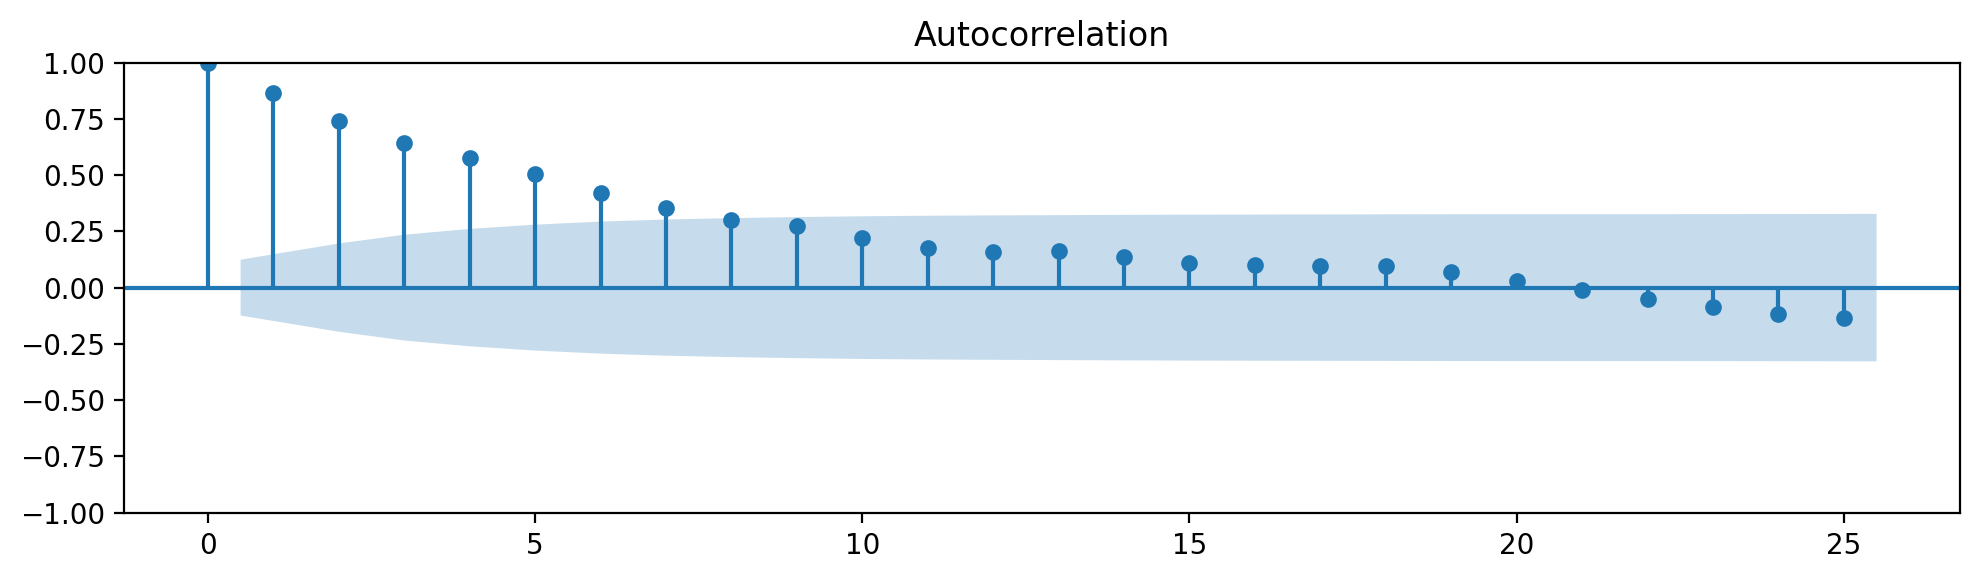

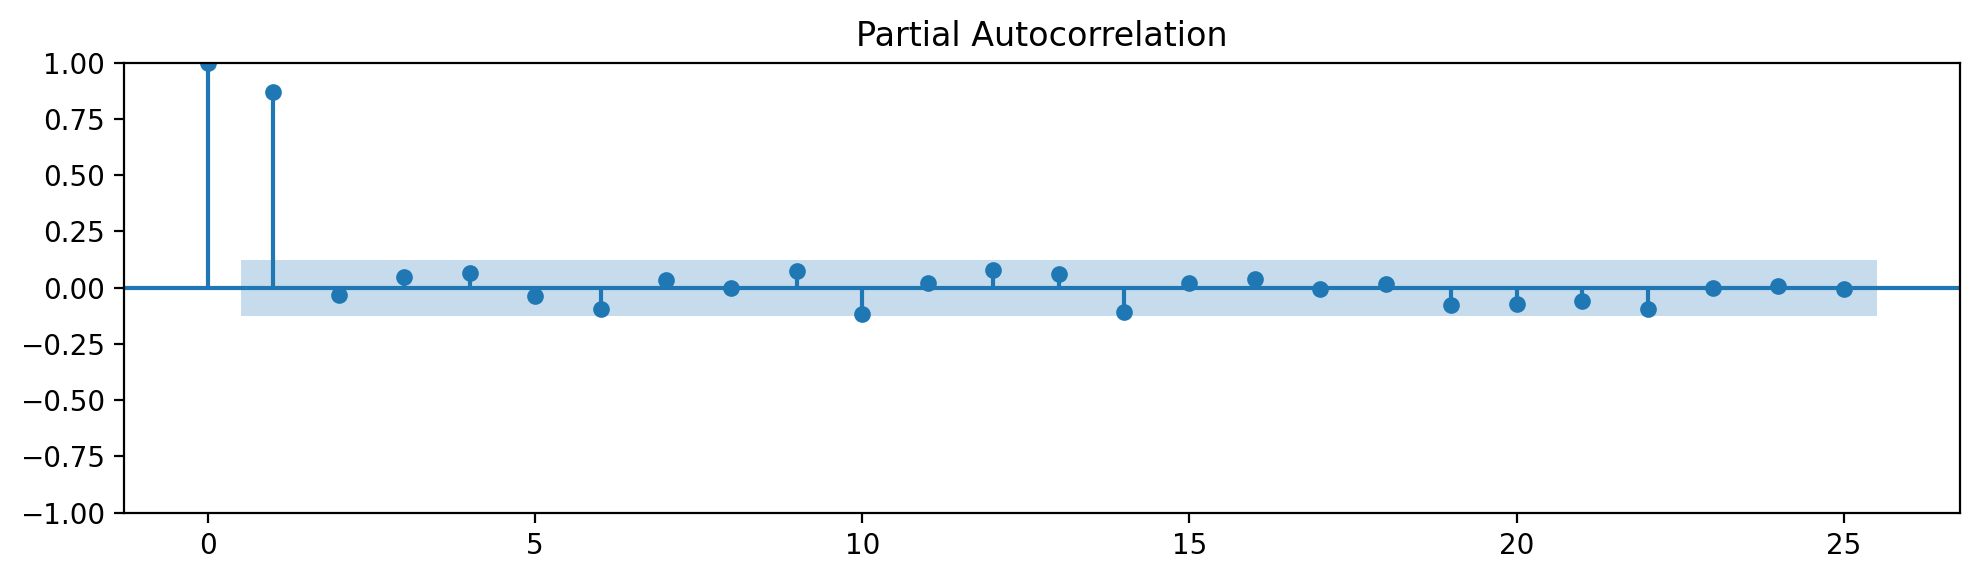

In [50]:
#ACF = plot_acf(msft['Close_log'].dropna(), lags=25)
# with the PACF, we can figure out how many lags we need in the AR model.
#PACF = plot_pacf(msft['Close_log'].dropna(), lags=25)

ACF = plot_acf(msft['ExpW'].dropna(), lags=25)
# with the PACF, we can figure out how many lags we need in the AR model.
PACF = plot_pacf(msft['ExpW'].dropna(), lags=25)


In [51]:
#residual for first time series T|T-1
#fit a linear regression model on T_i and T_i-1 and add it's predictions to the DataFrame as a new column
lm = linear_model.LinearRegression()
df_X = msft[['T-1']] #Note the double brackets! [[]]
df_y = msft['ExpW'] #Note the single brackets! []
model = lm.fit(df_X,df_y)
msft['Predicted_T|T-1'] = lm.predict(df_X)

#create the time series of residuals corresponding to the predictions of this model and add it to the DataFrame.
# This gives us the first one of the two time series we need for calculating the PACF for X at LAG=2
#Observed minus predicted
msft['Residual_T|T-1'] = msft['ExpW'] - msft['Predicted_T|T-1']
msft.head()

,Close,Close_diff,Close_log,Close_log_diff,ExpW,T-1,T-2,Predicted_T|T-1,Residual_T|T-1
Date,,,,,,,,,
2022-01-05,316.380005,-12.630005,5.756944,-0.039144,-0.037714,-0.012665,-0.002272,-0.013327,-0.024387
2022-01-06,313.880005,-2.500000,5.749011,-0.007933,-0.035434,-0.037714,-0.012665,-0.034976,-0.000458
2022-01-07,314.040009,0.160004,5.749520,0.000510,-0.028232,-0.035434,-0.037714,-0.033006,0.004774
2022-01-10,314.269989,0.229980,5.750252,0.000732,-0.022859,-0.028232,-0.035434,-0.026781,0.003922
2022-01-11,314.980011,0.710022,5.752509,0.002257,-0.017477,-0.022859,-0.028232,-0.022137,0.004660


In [52]:
# #repeat the above procedure to calculate the second time series of residuals
lm = linear_model.LinearRegression()
df_X = msft[['T-1']] #Note the double brackets! [[]]
df_y = msft['T-2'] #Note the single brackets! []
model = lm.fit(df_X,df_y)
msft['Predicted_T-2|T-1'] = lm.predict(df_X)
#Observed minus predicted
msft['Residual_T-2|T-1'] = msft['T-2'] - msft['Predicted_T-2|T-1']


In [53]:
#Finally, apply the formula for Pearson's r to the two time series of residuals to get the value of the PACF at LAG=2
print(msft.corr(method='pearson')['Residual_T|T-1']['Residual_T-2|T-1'])

-0.034982816312258184


In [55]:
from statsmodels.tsa.stattools import pacf
print(pacf(msft['ExpW'], nlags=2)[2])

-0.03372450464071014


In [56]:
msft

,Close,Close_diff,Close_log,Close_log_diff,ExpW,T-1,T-2,Predicted_T|T-1,Residual_T|T-1,Predicted_T-2|T-1,Residual_T-2|T-1
Date,,,,,,,,,,,
2022-01-05,316.380005,-12.630005,5.756944,-0.039144,-0.037714,-0.012665,-0.002272,-0.013327,-0.024387,-0.013304,0.011032
2022-01-06,313.880005,-2.500000,5.749011,-0.007933,-0.035434,-0.037714,-0.012665,-0.034976,-0.000458,-0.034955,0.022290
2022-01-07,314.040009,0.160004,5.749520,0.000510,-0.028232,-0.035434,-0.037714,-0.033006,0.004774,-0.032985,-0.004729
2022-01-10,314.269989,0.229980,5.750252,0.000732,-0.022859,-0.028232,-0.035434,-0.026781,0.003922,-0.026759,-0.008675
2022-01-11,314.980011,0.710022,5.752509,0.002257,-0.017477,-0.022859,-0.028232,-0.022137,0.004660,-0.022115,-0.006117
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,238.729996,0.539994,5.475333,0.002265,-0.021905,-0.025472,-0.001127,-0.024396,0.002491,-0.024374,0.023247
2022-12-27,236.960007,-1.769989,5.467891,-0.007442,-0.027700,-0.021905,-0.025472,-0.021313,-0.006387,-0.021291,-0.004181
2022-12-28,234.529999,-2.430008,5.457584,-0.010308,-0.035875,-0.027700,-0.021905,-0.026321,-0.009553,-0.026300,0.004394


In [57]:
msft.tail()

,Close,Close_diff,Close_log,Close_log_diff,ExpW,T-1,T-2,Predicted_T|T-1,Residual_T|T-1,Predicted_T-2|T-1,Residual_T-2|T-1
Date,,,,,,,,,,,
2022-12-23,238.729996,0.539994,5.475333,0.002265,-0.021905,-0.025472,-0.001127,-0.024396,0.002491,-0.024374,0.023247
2022-12-27,236.960007,-1.769989,5.467891,-0.007442,-0.027700,-0.021905,-0.025472,-0.021313,-0.006387,-0.021291,-0.004181
2022-12-28,234.529999,-2.430008,5.457584,-0.010308,-0.035875,-0.027700,-0.021905,-0.026321,-0.009553,-0.026300,0.004394
2022-12-29,241.009995,6.479996,5.484838,0.027255,-0.008136,-0.035875,-0.027700,-0.033387,0.025251,-0.033366,0.005665
2022-12-30,239.820007,-1.189988,5.479889,-0.004950,-0.012351,-0.008136,-0.035875,-0.009412,-0.002939,-0.009389,-0.026485


## Part 3: Implementing AR from scratch

In [58]:
def AR(p,df):
    df_temp = msft
    
    train_size = (int)(0.7 * df_temp.shape[0])

    #Breaking data set into test and training
    df_train = pd.DataFrame(df_temp[0:train_size])
    df_test = pd.DataFrame(df_temp[train_size:msft.shape[0]])

    #X contains the lagged values ,hence we skip some rows
    X_train = df_train.iloc[:,5].values.reshape(-1,p)

    #Y contains the value,it is the first column
    y_train = df_train.iloc[:,4].values.reshape(-1,1)
    #Running linear regression to generate the coefficents of lagged terms
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    
    theta  = lr.coef_.T
    intercept = lr.intercept_
    df_train['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
    # df_train_2[['Value','Predicted_Values']].plot()

    X_test = df_test.iloc[:,5].values.reshape(-1,p)
    df_test['Predicted_Values'] = X_test.dot(lr.coef_.T) + lr.intercept_
    # df_test[['Value','Predicted_Values']].plot()
    
    RMSE = np.sqrt(mean_squared_error(df_test['ExpW'], df_test['Predicted_Values']))

    print("The RMSE is :", RMSE,", Value of p : ",p)
    return [df_train,df_test,theta,intercept,RMSE]

In [59]:
X_train = df_train.iloc[:,2]
X_train

NameError: name 'df_train' is not defined

In [60]:
lag_num = 1

In [61]:
[df_train,df_test,theta,intercept,RMSE] = AR(lag_num,pd.DataFrame(msft.Close_diff))

The RMSE is : 0.02233258184424537 , Value of p :  1


In [62]:
msft

,Close,Close_diff,Close_log,Close_log_diff,ExpW,T-1,T-2,Predicted_T|T-1,Residual_T|T-1,Predicted_T-2|T-1,Residual_T-2|T-1
Date,,,,,,,,,,,
2022-01-05,316.380005,-12.630005,5.756944,-0.039144,-0.037714,-0.012665,-0.002272,-0.013327,-0.024387,-0.013304,0.011032
2022-01-06,313.880005,-2.500000,5.749011,-0.007933,-0.035434,-0.037714,-0.012665,-0.034976,-0.000458,-0.034955,0.022290
2022-01-07,314.040009,0.160004,5.749520,0.000510,-0.028232,-0.035434,-0.037714,-0.033006,0.004774,-0.032985,-0.004729
2022-01-10,314.269989,0.229980,5.750252,0.000732,-0.022859,-0.028232,-0.035434,-0.026781,0.003922,-0.026759,-0.008675
2022-01-11,314.980011,0.710022,5.752509,0.002257,-0.017477,-0.022859,-0.028232,-0.022137,0.004660,-0.022115,-0.006117
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,238.729996,0.539994,5.475333,0.002265,-0.021905,-0.025472,-0.001127,-0.024396,0.002491,-0.024374,0.023247
2022-12-27,236.960007,-1.769989,5.467891,-0.007442,-0.027700,-0.021905,-0.025472,-0.021313,-0.006387,-0.021291,-0.004181
2022-12-28,234.529999,-2.430008,5.457584,-0.010308,-0.035875,-0.027700,-0.021905,-0.026321,-0.009553,-0.026300,0.004394


<AxesSubplot:xlabel='Date'>

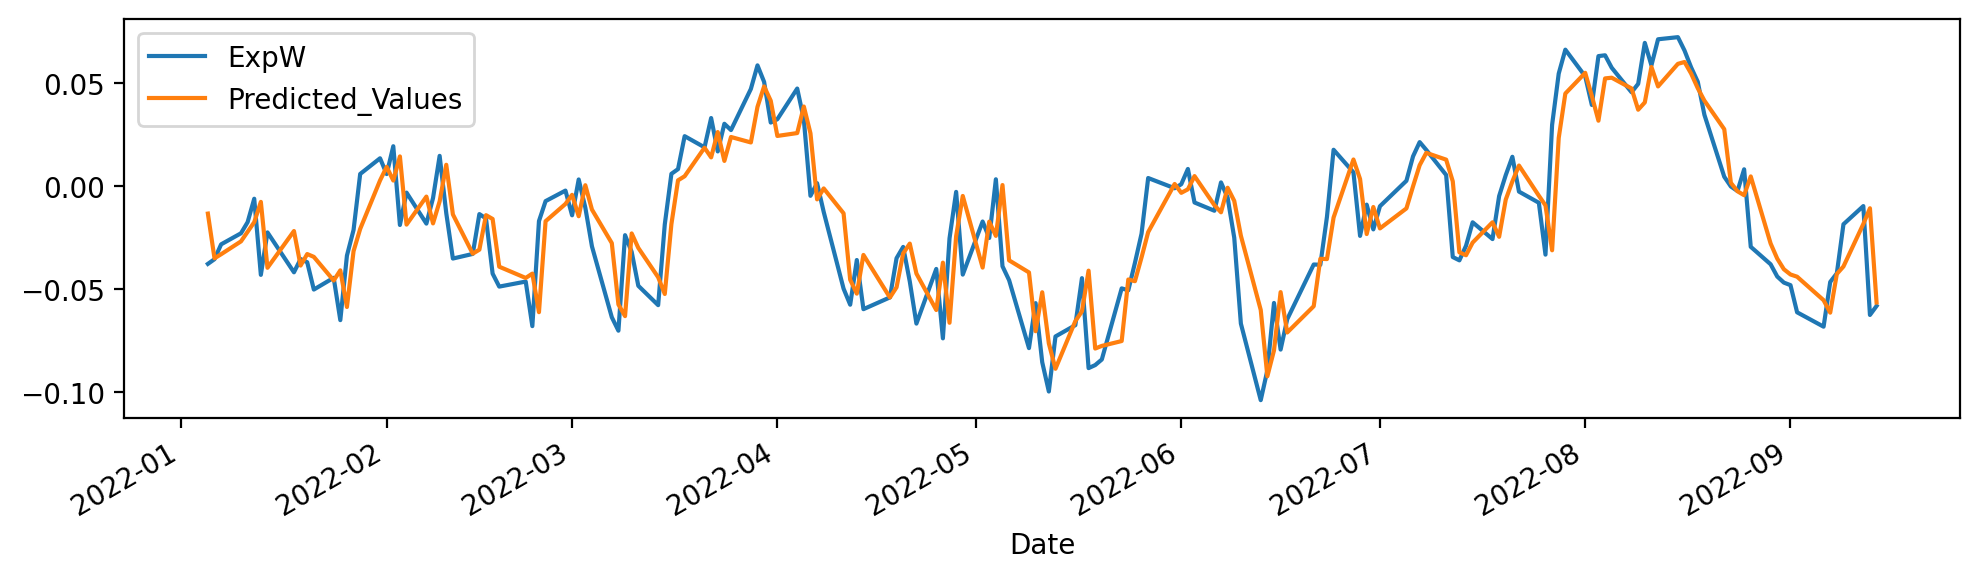

In [64]:
df_train[['ExpW','Predicted_Values']].plot()

<AxesSubplot:xlabel='Date'>

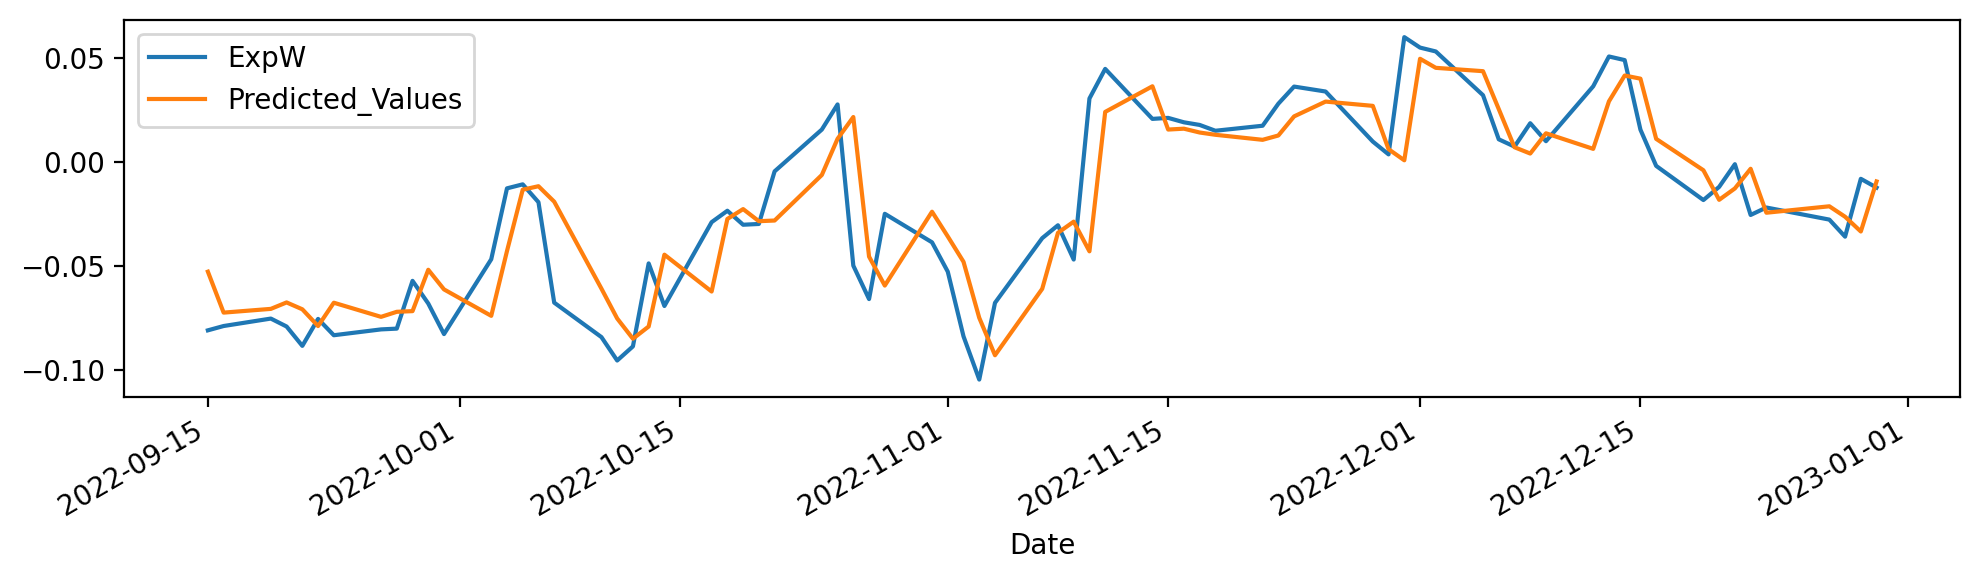

In [65]:
df_test[['ExpW','Predicted_Values']].plot()